In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import PIL
import os, glob, sys, shutil
#import vissl
import tensorboard
#import apex
import torch
#from vissl.utils.io import load_file
import xarray
import math
import cv2
#from vissl.utils.io import save_file
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [6]:
files = np.load('/p/project/deepacf/kiste/DC/august_germany/k7/train_2x96_128/samples_k10_800ep.npy')
df_subset = pd.read_csv('/p/project/deepacf/kiste/DC/august_germany/k7/train_2x96_128/tsne_k7_800epphy_g128.csv')
len(df_subset)

664332

In [3]:
df_subset

,tsne-dcv22d-one,tsne-dcv22d-two,location,y,label,tsne-2d-one,tsne-2d-two,sds_mean,cot_mean,trs_mean,...,cmask_mean,ctt_mean,sds_std,cot_std,trs_std,cth_std,cph_std,ctp_std,cmask_std,ctt_std
0,0.307169,0.561795,/p/scratch/deepacf/kiste/DC/dataset/bigdata_ce...,0,0,0.537995,0.628835,137.150680,3.561166,108.278160,...,0.628418,262.71980,3.855177,8.890496,2.942128,440.813141,0.032992,40.051216,0.030729,1.654953
1,0.294421,0.590051,/p/scratch/deepacf/kiste/DC/dataset/bigdata_ce...,5,5,0.538495,0.628981,132.765230,1.865656,83.093460,...,0.299683,264.07965,9.282659,7.751473,7.584449,187.536972,0.068196,19.942303,0.050516,0.743387
2,0.245873,0.735240,/p/scratch/deepacf/kiste/DC/dataset/bigdata_ce...,5,5,0.646054,0.655317,110.764360,0.220264,57.911070,...,0.113708,266.35907,5.263228,0.497004,5.180387,153.094864,0.090043,18.395763,0.081197,0.369795
3,0.369381,0.674166,/p/scratch/deepacf/kiste/DC/dataset/bigdata_ce...,3,3,0.635769,0.562828,154.194920,0.700319,86.089770,...,0.402710,265.54132,9.630256,4.000542,8.230330,94.174332,0.078468,10.023592,0.060696,0.597501
4,0.304501,0.700157,/p/scratch/deepacf/kiste/DC/dataset/bigdata_ce...,5,5,0.653098,0.634747,102.169110,0.446641,64.925090,...,0.338562,257.11285,3.698778,0.388903,3.318445,1517.041138,0.184419,109.154228,0.067806,9.427555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664327,0.407446,0.117203,/p/scratch/deepacf/kiste/DC/dataset/bigdata_ce...,0,0,0.257042,0.645194,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
664328,0.344218,0.049723,/p/scratch/deepacf/kiste/DC/dataset/bigdata_ce...,0,0,0.110417,0.615522,57.397175,6.816216,77.158470,...,0.693481,267.43326,3.474363,12.961824,2.586693,812.563599,0.092640,47.497009,0.044201,5.183485
664329,0.367496,0.093883,/p/scratch/deepacf/kiste/DC/dataset/bigdata_ce...,0,0,0.257373,0.645259,63.929800,9.134827,75.860085,...,0.496643,273.74530,3.214612,11.055335,2.671847,676.500671,0.034042,45.117092,0.020812,3.449183
664330,0.425169,0.139637,/p/scratch/deepacf/kiste/DC/dataset/bigdata_ce...,0,0,0.257829,0.645245,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_subset['y_old'] = ''
for _ in range(len(df_subset)):
    if (df_subset['y'][_] == 0):
        df_subset.at[_,'y_old'] = 5
    if (df_subset['y'][_] == 1):
        df_subset.at[_,'y_old'] = 4
    if (df_subset['y'][_] == 2):
        df_subset.at[_,'y_old'] = 2
    if (df_subset['y'][_] == 3):
        df_subset.at[_,'y_old'] = 0
    if (df_subset['y'][_] == 4):
        df_subset.at[_,'y_old'] = 3
    if (df_subset['y'][_] == 5):
        df_subset.at[_,'y_old'] = 1
    if (df_subset['y'][_] == 6):
        df_subset.at[_,'y_old'] = 6

In [4]:
df_subset.columns

Index(['tsne-dcv22d-one', 'tsne-dcv22d-two', 'location', 'y', 'label',
       'tsne-2d-one', 'tsne-2d-two', 'sds_mean', 'cot_mean', 'trs_mean',
       'cth_mean', 'cph_mean', 'ctp_mean', 'cmask_mean', 'ctt_mean', 'sds_std',
       'cot_std', 'trs_std', 'cth_std', 'cph_std', 'ctp_std', 'cmask_std',
       'ctt_std', 'y_old'],
      dtype='object')

In [8]:
df_main = df_subset
df_main['label_old'] = df_main['y_old'].apply(lambda i: str(i))
df_main['label'] = df_main['y'].apply(lambda i: str(i))
len(df_main)

664332

In [13]:
df_main = df_main.dropna()
len(df_main)

647879

In [16]:
a1=np.nanmean(df_main.query("y_old == 0")['cmask_mean'].values)

In [44]:
parameter = 'sds_mean'
[np.nanmean(df_main.query("y_old == 0")[parameter].values),
np.nanmean(df_main.query("y_old == 1")[parameter].values),
np.nanmean(df_main.query("y_old == 2")[parameter].values),
np.nanmean(df_main.query("y_old == 3")[parameter].values),
np.nanmean(df_main.query("y_old == 4")[parameter].values),
np.nanmean(df_main.query("y_old == 5")[parameter].values),
np.nanmean(df_main.query("y_old == 6")[parameter].values)]

[483.49244406708044,
 571.2797069748649,
 632.6154879621088,
 442.7108134765398,
 302.5671053898751,
 247.11204158963048,
 400.2627594762985]

In [43]:
parameter = 'trs_std'
[np.nanmean(df_main.query("y_old == 0")[parameter].values),
np.nanmean(df_main.query("y_old == 1")[parameter].values),
np.nanmean(df_main.query("y_old == 2")[parameter].values),
np.nanmean(df_main.query("y_old == 3")[parameter].values),
np.nanmean(df_main.query("y_old == 4")[parameter].values),
np.nanmean(df_main.query("y_old == 5")[parameter].values),
np.nanmean(df_main.query("y_old == 6")[parameter].values)]

[16.188110975219704,
 13.83553608305538,
 19.630903524609312,
 17.848049993921368,
 18.10928656325017,
 14.544977516922518,
 17.055408458571517]

In [26]:
df_subset_128 = df_main
x_128 = [len(df_subset_128.loc[df_subset_128['y_old']==0]),len(df_subset_128.loc[df_subset_128['y_old']==1]),
     len(df_subset_128.loc[df_subset_128['y_old']==2]),len(df_subset_128.loc[df_subset_128['y_old']==3]),
     len(df_subset_128.loc[df_subset_128['y_old']==4]),len(df_subset_128.loc[df_subset_128['y_old']==5]),
     len(df_subset_128.loc[df_subset_128['y_old']==6])]

x_128 = [i/len(df_subset_128) * 100 for i in x_128]
x_128

[9.873448591480818,
 24.477255783873222,
 8.961704268852671,
 12.477484221590759,
 14.598250599263135,
 14.947544217361575,
 14.554878302892979]

In [9]:
df_main= df_main[df_main['cot_mean'].notna()]
len(df_main)

664073

In [10]:
df_main= df_main[df_main['ctp_mean'].notna()]
len(df_main)

647879

In [11]:
df_main= df_main[df_main['ctt_mean'].notna()]
len(df_main)

647879

In [12]:
df_main1 = df_main[df_main.y != -100]
#df_main = df_main[df_main.y != 1]
#result = [df_main,df_main_label1]
#df_main1 = pd.concat(result)
labels = df_main1['label_old']
len(df_main1)

647170

/tmp/ipykernel_15643/2848291272.py:50: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([0,5,10,15,20,25,30,35,40], fontsize = f_ticks)


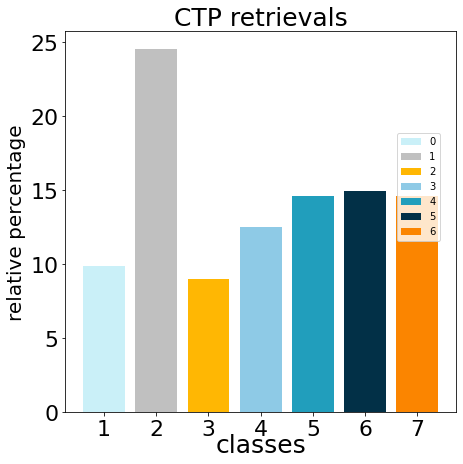

In [13]:
x_128 = [len(df_main1.loc[df_main1['label_old']=='0']),len(df_main1.loc[df_main1['label_old']=='1']),
     len(df_main1.loc[df_main1['label_old']=='2']),len(df_main1.loc[df_main1['label_old']=='3']),
     len(df_main1.loc[df_main1['label_old']=='4']),len(df_main1.loc[df_main1['label_old']=='5']),
     len(df_main1.loc[df_main1['label_old']=='6'])]
#colors_per_class1 = {
#    '0' : 'CAF0F8',
#    '1' : 'C0C0C0',
#    '2' : 'FFB703',
#    '3' : '8ECAE6',
#    '4' : '219EBC',
#    '5' : '023047',
#    '6' : 'FB8500',
    #'7' : [52, 31, 151],
    #'8' : [0, 0, 0],
    #'9' : [100, 100, 255],
#}
colors_per_class1 = {
    '0' : [202, 240, 248], 
    '1' : [192, 192, 192],
    '2' : [255, 183, 3],
    '3' : [142, 202, 230],
    '4' : [33, 158, 188],
    '5' : [2, 48, 71],
    '6' : [251, 133, 0],
    #'7' : [52, 31, 151],
    #'8' : [0, 0, 0],
    #'9' : [100, 100, 255],
}
x_128 = [i/len(df_main1) * 100 for i in x_128]

f_ticks=22
f_label=25
f_title=27
fig, ax = plt.subplots(1, 1, figsize=(7, 7)) #,constrained_layout=True
#fig.suptitle('Number of images in each class',fontsize =f_title-2)

for label in colors_per_class1:
    x_ = int(label)
    color = np.array([colors_per_class1[label]], dtype=np.float) / 255
    
    ax.bar(x_,x_128[int(label)], color=color,label=int(label))

    ax.legend(loc=(0.85,0.45)) 
    
ax.set_ylabel('relative percentage', fontsize=f_label-5)
ax.set_xlabel('classes', fontsize=f_label)
ax.xaxis.set_label_coords(1.01, -.1)
ax.set_xticks([0,1,2,3,4,5,6])
ax.set_xticklabels([1,2,3,4,5,6,7], fontsize = f_ticks)
ax.set_yticklabels([0,5,10,15,20,25,30,35,40], fontsize = f_ticks)
ax.set_title('CTP retrievals', fontsize = f_label)
ax.xaxis.set_label_coords(0.5, -0.055)

In [37]:

colors_per_class1 = {
    '0' : [202, 240, 248], 
    '1' : [192, 192, 192],
    '2' : [255, 183, 3],
    '3' : [142, 202, 230],
    '4' : [33, 158, 188],
    '5' : [2, 48, 71],
    '6' : [251, 133, 0],
    #'7' : [52, 31, 151],
    #'8' : [0, 0, 0],
    #'9' : [100, 100, 255],
}

n1=1000

a1=df_main1.query("y_old == 0").sample(n=n1)
a2=df_main1.query("y_old == 1").sample(n=n1)
a3=df_main1.query("y_old == 2").sample(n=n1)
a4=df_main1.query("y_old == 3").sample(n=n1)
a5=df_main1.query("y_old == 4").sample(n=n1)
a6=df_main1.query("y_old == 5").sample(n=n1)
a7=df_main1.query("y_old == 6").sample(n=n1)

result = [a1,a2,a3,a4,a5,a6,a7]
df_main2 = pd.concat(result)
df_main2['index'] = range(0, 7000)
df_main2 = df_main2.set_index('index')

labels_dfmain2 = df_main2['label_old']

def Average(lst):
    a = np.nanmean(lst)
    return a

def calculateDistance(x1,y1,x2,y2):
    dist = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    return dist

def compute_plot_coordinates(image, x, y, image_centers_area_size, offset):
    image_height, image_width, _ = image.shape

    # compute the image center coordinates on the plot
    center_x = int(image_centers_area_size * x) + offset

    # in matplotlib, the y axis is directed upward
    # to have the same here, we need to mirror the y coordinate
    center_y = int(image_centers_area_size * (1 - y)) + offset

    # knowing the image center, compute the coordinates of the top left and bottom right corner
    tl_x = center_x - int(image_width / 2)
    tl_y = center_y - int(image_height / 2)

    br_x = tl_x + image_width
    br_y = tl_y + image_height

    return tl_x, tl_y, br_x, br_y

def scale_image(image, max_image_size):
    image_height, image_width, _ = image.shape

    scale = max(1, image_width / max_image_size, image_height / max_image_size)
    image_width = int(image_width / scale)
    image_height = int(image_height / scale)

    image = cv2.resize(image, (image_width, image_height))
    return image

def draw_rectangle_by_class(image, label):
    image_height, image_width, _ = image.shape

    # get the color corresponding to image class
    color = colors_per_class1[label]
    image = cv2.rectangle(image, (0, 0), (image_width - 1, image_height - 1), color=color, thickness=5)

    return image

plot_size=1000
max_image_size=100

offset = max_image_size // 2
image_centers_area_size = plot_size - 2 * offset

tsne_plot = 255 * np.ones((plot_size, plot_size, 3), np.uint8)

ctt,ctt_mean = [],[]  # sds = ctt
cth,cth_mean = [],[]  # trs = cth
std_mean_ctt, std_mean_cth = [],[]
for label in colors_per_class1:
    indices = [i for i, l in enumerate(labels_dfmain2) if l == label]
    if label == '0':
        current_tx = df_main2.iloc[indices]['cot_mean']
        current_ty = df_main2.iloc[indices]['ctp_mean']
        ctt_mean.append(Average(current_tx))
        cth_mean.append(Average(current_ty))
        std_mean_ctt.append((np.std(current_tx))/np.sqrt(len(current_tx)))
        std_mean_cth.append((np.std(current_ty))/np.sqrt(len(current_ty)))
        ctt_distance = np.linalg.norm(current_tx - Average(current_tx))
        for _ in range(len(current_tx)):
            distance = calculateDistance(current_tx.iloc[_],current_ty.iloc[_],Average(current_tx),Average(current_ty))
            df_main2.at[indices[_],'mean_distance'] = distance
    if label == '1':
        current_tx = df_main2.iloc[indices]['cot_mean']
        current_ty = df_main2.iloc[indices]['ctp_mean']
        ctt_mean.append(Average(current_tx))
        cth_mean.append(Average(current_ty))
        std_mean_ctt.append((np.std(current_tx))/np.sqrt(len(current_tx)))
        std_mean_cth.append((np.std(current_ty))/np.sqrt(len(current_ty)))
        for _ in range(len(current_tx)):
            distance = calculateDistance(current_tx.iloc[_],current_ty.iloc[_],Average(current_tx),Average(current_ty))
            df_main2.at[indices[_],'mean_distance'] = distance
    if label == '2':
        current_tx = df_main2.iloc[indices]['cot_mean']
        current_ty = df_main2.iloc[indices]['ctp_mean']
        ctt_mean.append(Average(current_tx))
        cth_mean.append(Average(current_ty))
        std_mean_ctt.append((np.std(current_tx))/np.sqrt(len(current_tx)))
        std_mean_cth.append((np.std(current_ty))/np.sqrt(len(current_ty)))
        for _ in range(len(current_tx)):
            distance = calculateDistance(current_tx.iloc[_],current_ty.iloc[_],Average(current_tx),Average(current_ty))
            df_main2.at[indices[_],'mean_distance'] = distance
    if label == '3':
        current_tx = df_main2.iloc[indices]['cot_mean']
        current_ty = df_main2.iloc[indices]['ctp_mean']
        ctt_mean.append(Average(current_tx))
        cth_mean.append(Average(current_ty))
        std_mean_ctt.append((np.std(current_tx))/np.sqrt(len(current_tx)))
        std_mean_cth.append((np.std(current_ty))/np.sqrt(len(current_ty)))
        for _ in range(len(current_tx)):
            distance = calculateDistance(current_tx.iloc[_],current_ty.iloc[_],Average(current_tx),Average(current_ty))
            df_main2.at[indices[_],'mean_distance'] = distance
    if label == '4':
        current_tx = df_main2.iloc[indices]['cot_mean']
        current_ty = df_main2.iloc[indices]['ctp_mean']
        ctt_mean.append(Average(current_tx))
        cth_mean.append(Average(current_ty))
        std_mean_ctt.append((np.std(current_tx))/np.sqrt(len(current_tx)))
        std_mean_cth.append((np.std(current_ty))/np.sqrt(len(current_ty)))
        for _ in range(len(current_tx)):
            distance = calculateDistance(current_tx.iloc[_],current_ty.iloc[_],Average(current_tx),Average(current_ty))
            df_main2.at[indices[_],'mean_distance'] = distance
    if label == '5':
        current_tx = df_main2.iloc[indices]['cot_mean']
        current_ty = df_main2.iloc[indices]['ctp_mean']
        ctt_mean.append(Average(current_tx))
        cth_mean.append(Average(current_ty))
        std_mean_ctt.append((np.std(current_tx))/np.sqrt(len(current_tx)))
        std_mean_cth.append((np.std(current_ty))/np.sqrt(len(current_ty)))
        for _ in range(len(current_tx)):
            distance = calculateDistance(current_tx.iloc[_],current_ty.iloc[_],Average(current_tx),Average(current_ty))
            df_main2.at[indices[_],'mean_distance'] = distance
    if label == '6':
        current_tx = df_main2.iloc[indices]['cot_mean']
        current_ty = df_main2.iloc[indices]['ctp_mean']
        ctt_mean.append(Average(current_tx))
        cth_mean.append(Average(current_ty))
        std_mean_ctt.append((np.std(current_tx))/np.sqrt(len(current_tx)))
        std_mean_cth.append((np.std(current_ty))/np.sqrt(len(current_ty)))
        for _ in range(len(current_tx)):
            distance = calculateDistance(current_tx.iloc[_],current_ty.iloc[_],Average(current_tx),Average(current_ty))
            df_main2.at[indices[_],'mean_distance'] = distance

min_idx_labels=[]
for label in colors_per_class1:
    indices = [i for i, l in enumerate(labels_dfmain2) if l == label]
    df_main2['mean_distance'] = pd.to_numeric(df_main2['mean_distance'])
    if label == '0':
        distance = df_main2.loc[indices]['mean_distance']
        minvalueIndexLabel = distance.idxmin()
        min_idx_labels.append(minvalueIndexLabel)
    if label == '1':
        distance = df_main2.loc[indices]['mean_distance']
        minvalueIndexLabel = distance.idxmin()
        min_idx_labels.append(minvalueIndexLabel)
    if label == '2':
        distance = df_main2.loc[indices]['mean_distance']
        minvalueIndexLabel = distance.idxmin()
        min_idx_labels.append(minvalueIndexLabel)
    if label == '3':
        distance = df_main2.loc[indices]['mean_distance']
        minvalueIndexLabel = distance.idxmin()
        min_idx_labels.append(minvalueIndexLabel)
    if label == '4':
        distance = df_main2.loc[indices]['mean_distance']
        minvalueIndexLabel = distance.idxmin()
        min_idx_labels.append(minvalueIndexLabel)
    if label == '5':
        distance = df_main2.loc[indices]['mean_distance']
        minvalueIndexLabel = distance.idxmin()
        min_idx_labels.append(minvalueIndexLabel)
    if label == '6':
        distance = df_main2.loc[indices]['mean_distance']
        minvalueIndexLabel = distance.idxmin()
        min_idx_labels.append(minvalueIndexLabel)

min_idx_labels

[246, 1670, 2838, 3456, 4904, 5859, 6110]

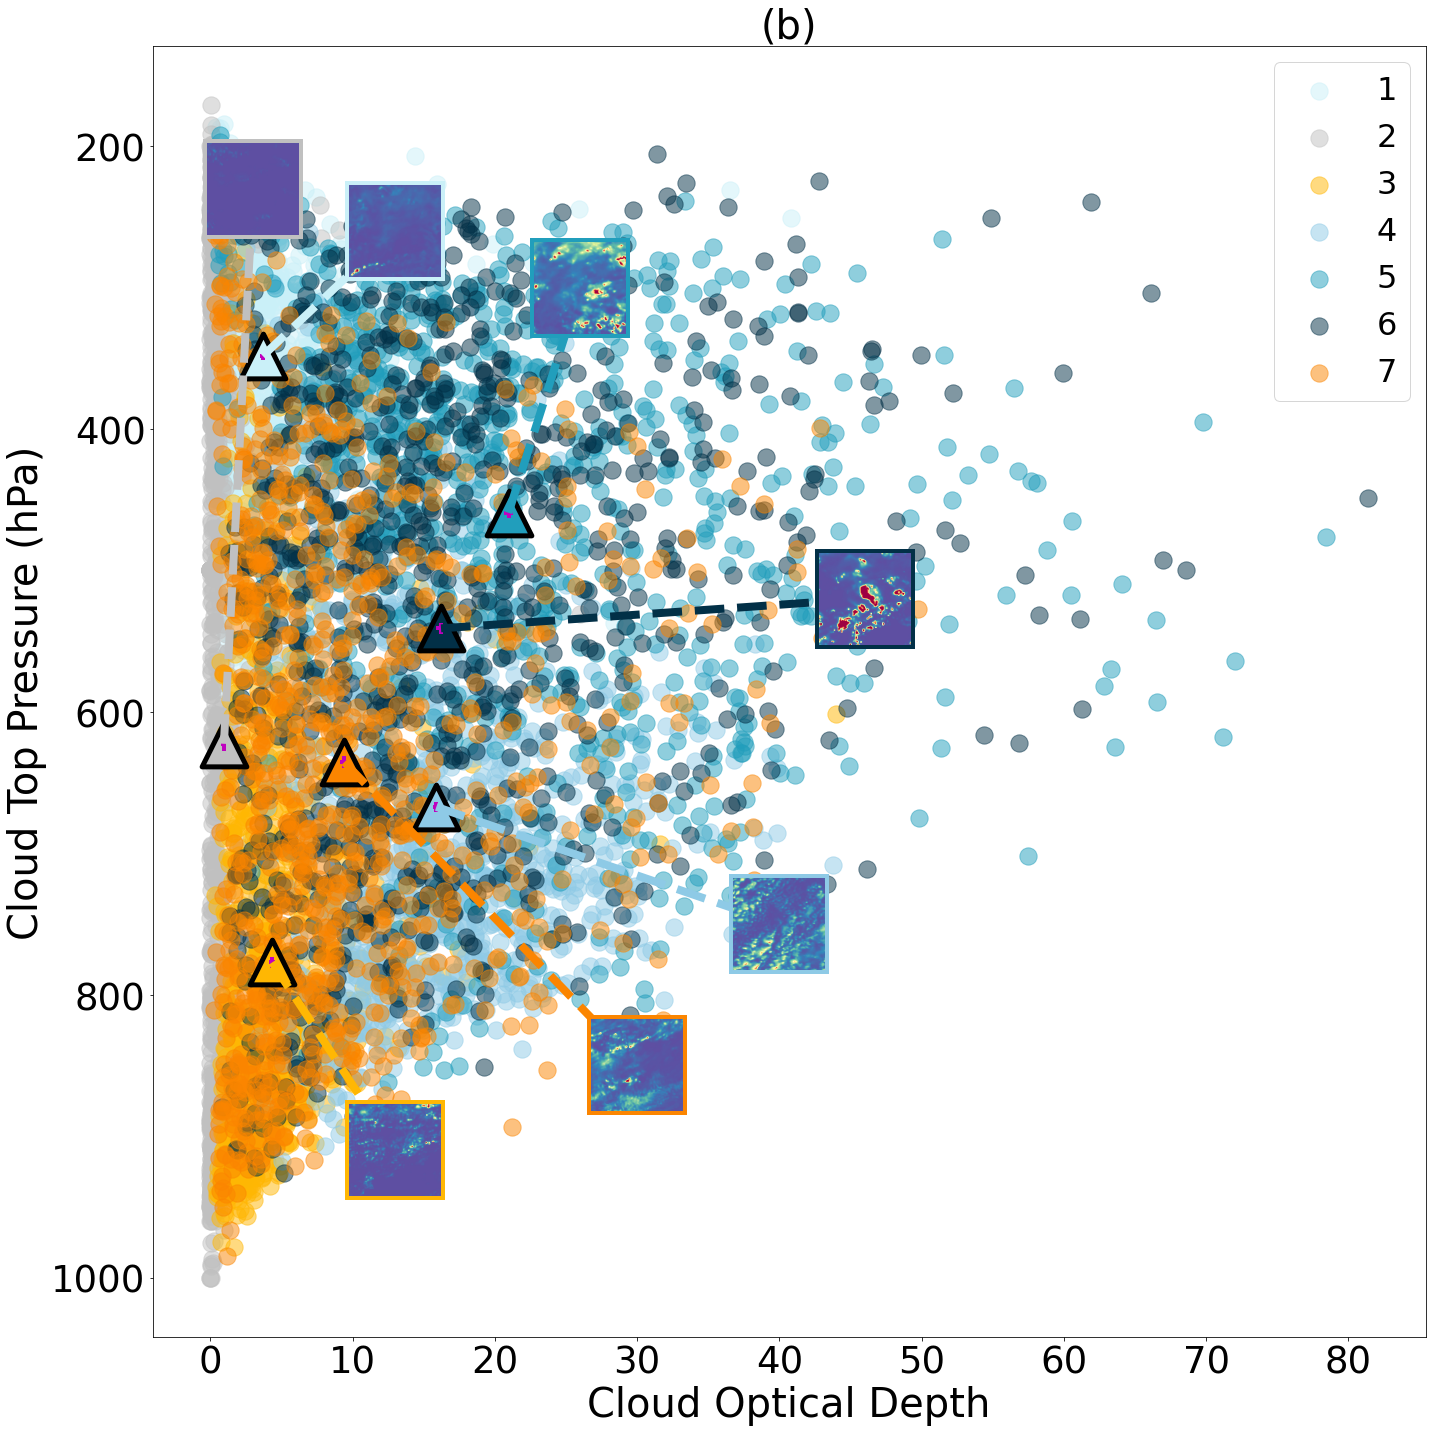

In [38]:
#colors_per_class1 = {
#    '0' : [254, 202, 87],
#    '1' : [255, 107, 107],
#    '2' : [10, 189, 227],
#    '3' : [255, 159, 243],
#    '4' : [16, 172, 132],
#    '5' : [128, 80, 128],
#    '6' : [87, 101, 116],
#    '7' : [52, 31, 151],
#    '8' : [0, 0, 0],
#    '9' : [100, 100, 255],
#}

x_pos =[13,3,13,40,26,46,30,243,233,270]
y_pos = [260,230,910,750,300,520,850,8020,6700,4000]

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)

for label in colors_per_class1:
    indices = [i for i, l in enumerate(labels_dfmain2) if l == label]
    #if label == '0':
     
    current_tx = df_main2.iloc[indices]['cot_mean']    # indices are taking care of the correspondence
    current_ty = df_main2.iloc[indices]['ctp_mean']
    color = np.array([colors_per_class1[label]], dtype=np.float) / 255 
    ax.scatter(current_tx, current_ty, c=color, label=int(label)+1, s= 300,alpha=0.5)
    ax.legend(loc='best')
    #ax.scatter(ctt_mean[int(label)], cth_mean[int(label)], c=color, label='_nolegend_', marker='^', s=2000,) # scatter triangle
    
    
    x, y = ctt_mean[int(label)], cth_mean[int(label)]
    endy = y + std_mean_cth[(int(label))] #* math.sin(math.radians(90))
    endx = x + std_mean_ctt[(int(label))] #* math.cos(math.radians(0))
    plt.plot(((x-((x+endx)/2-x)),((x+endx)/2)),(y,y),'m',linewidth=4.0)
    plt.plot((x,x),((y-((y+endy)/2-y)),((y+endy)/2)),'m',linewidth=4.0)#, [y, endy]
    
    x, y = ctt_mean[int(label)], cth_mean[int(label)]
    endx,endy= x_pos[int(label)],y_pos[int(label)]

    ax.plot([x, endx], [y, endy],'--',color = color[0],linewidth=8)
    
    x_loc,y_loc = x_pos[int(label)],y_pos[int(label)]
    image_path = df_main2.iloc[min_idx_labels[int(label)]]['location']
    #image_path = image_path.replace('train_juelich_128x128_15k','train_juelich_npy_128x128_15k')
    image = plt.imread(image_path) # cv2.imread(image_path)
    image = scale_image(image, max_image_size)
    image = draw_rectangle_by_class(image, label)    
    offset=OffsetImage(image)
    ab = AnnotationBbox(offset, (x_loc, y_loc), frameon=False)

    ax.add_artist(ab)
    
for label in colors_per_class1:
    color = np.array([colors_per_class1[label]], dtype=np.float) / 255
    ax.scatter(ctt_mean[int(label)], cth_mean[int(label)], c=color, label='_nolegend_', marker='^', s=2000,edgecolors='black',linewidth=5)

f_title = 40    

plt.legend(prop={'size': 32})
ax.tick_params(axis='both', which='major', labelsize=37)
ax.set_title('(b)',fontsize=f_title)
plt.xlabel('Cloud Optical Depth',fontsize=40)
plt.ylabel('Cloud Top Pressure (hPa)',fontsize=40)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [39]:
fig.savefig('/p/project/deepacf/kiste/DC/dataset/result_largescale/cot_ctp_k7oct.png',transparent=False,dpi=80,bbox_inches='tight')

In [40]:
sds,sds_mean = [],[]
trs,trs_mean = [],[]
std_mean_sds, std_mean_trs = [],[]
for label in colors_per_class1:
    indices = [i for i, l in enumerate(labels_dfmain2) if l == label]
    if label == '0':
        current_tx = df_main2.iloc[indices]['sds_mean']
        current_ty = df_main2.iloc[indices]['trs_mean']
        sds_mean.append(Average(current_tx))
        trs_mean.append(Average(current_ty))
        std_mean_sds.append((np.std(current_tx))/np.sqrt(len(current_tx)))
        std_mean_trs.append((np.std(current_ty))/np.sqrt(len(current_ty)))
        sds_distance = np.linalg.norm(current_tx - Average(current_tx))
        for _ in range(len(current_tx)):
            distance = calculateDistance(current_tx.iloc[_],current_ty.iloc[_],Average(current_tx),Average(current_ty))
            df_main2.at[indices[_],'mean_distance'] = distance
    if label == '1':
        current_tx = df_main2.iloc[indices]['sds_mean']
        current_ty = df_main2.iloc[indices]['trs_mean']
        sds_mean.append(Average(current_tx))
        trs_mean.append(Average(current_ty))
        std_mean_sds.append((np.std(current_tx))/np.sqrt(len(current_tx)))
        std_mean_trs.append((np.std(current_ty))/np.sqrt(len(current_ty)))
        for _ in range(len(current_tx)):
            distance = calculateDistance(current_tx.iloc[_],current_ty.iloc[_],Average(current_tx),Average(current_ty))
            df_main2.at[indices[_],'mean_distance'] = distance
    if label == '2':
        current_tx = df_main2.iloc[indices]['sds_mean']
        current_ty = df_main2.iloc[indices]['trs_mean']
        sds_mean.append(Average(current_tx))
        trs_mean.append(Average(current_ty))
        std_mean_sds.append((np.std(current_tx))/np.sqrt(len(current_tx)))
        std_mean_trs.append((np.std(current_ty))/np.sqrt(len(current_ty)))
        for _ in range(len(current_tx)):
            distance = calculateDistance(current_tx.iloc[_],current_ty.iloc[_],Average(current_tx),Average(current_ty))
            df_main2.at[indices[_],'mean_distance'] = distance
    if label == '3':
        current_tx = df_main2.iloc[indices]['sds_mean']
        current_ty = df_main2.iloc[indices]['trs_mean']
        sds_mean.append(Average(current_tx))
        trs_mean.append(Average(current_ty))
        std_mean_sds.append((np.std(current_tx))/np.sqrt(len(current_tx)))
        std_mean_trs.append((np.std(current_ty))/np.sqrt(len(current_ty)))
        for _ in range(len(current_tx)):
            distance = calculateDistance(current_tx.iloc[_],current_ty.iloc[_],Average(current_tx),Average(current_ty))
            df_main2.at[indices[_],'mean_distance'] = distance
    if label == '4':
        current_tx = df_main2.iloc[indices]['sds_mean']
        current_ty = df_main2.iloc[indices]['trs_mean']
        sds_mean.append(Average(current_tx))
        trs_mean.append(Average(current_ty))
        std_mean_sds.append((np.std(current_tx))/np.sqrt(len(current_tx)))
        std_mean_trs.append((np.std(current_ty))/np.sqrt(len(current_ty)))
        for _ in range(len(current_tx)):
            distance = calculateDistance(current_tx.iloc[_],current_ty.iloc[_],Average(current_tx),Average(current_ty))
            df_main2.at[indices[_],'mean_distance'] = distance
    if label == '5':
        current_tx = df_main2.iloc[indices]['sds_mean']
        current_ty = df_main2.iloc[indices]['trs_mean']
        sds_mean.append(Average(current_tx))
        trs_mean.append(Average(current_ty))
        std_mean_sds.append((np.std(current_tx))/np.sqrt(len(current_tx)))
        std_mean_trs.append((np.std(current_ty))/np.sqrt(len(current_ty)))
        for _ in range(len(current_tx)):
            distance = calculateDistance(current_tx.iloc[_],current_ty.iloc[_],Average(current_tx),Average(current_ty))
            df_main2.at[indices[_],'mean_distance'] = distance
    if label == '6':
        current_tx = df_main2.iloc[indices]['sds_mean']
        current_ty = df_main2.iloc[indices]['trs_mean']
        sds_mean.append(Average(current_tx))
        trs_mean.append(Average(current_ty))
        std_mean_sds.append((np.std(current_tx))/np.sqrt(len(current_tx)))
        std_mean_trs.append((np.std(current_ty))/np.sqrt(len(current_ty)))
        for _ in range(len(current_tx)):
            distance = calculateDistance(current_tx.iloc[_],current_ty.iloc[_],Average(current_tx),Average(current_ty))
            df_main2.at[indices[_],'mean_distance'] = distance
            
min_idx_labels=[]
for label in colors_per_class1:
    indices = [i for i, l in enumerate(labels_dfmain2) if l == label]
    df_main2['mean_distance'] = pd.to_numeric(df_main2['mean_distance'])
    if label == '0':
        distance = df_main2.loc[indices]['mean_distance']
        minvalueIndexLabel = distance.idxmin()
        min_idx_labels.append(minvalueIndexLabel)
    if label == '1':
        distance = df_main2.loc[indices]['mean_distance']
        minvalueIndexLabel = distance.idxmin()
        min_idx_labels.append(minvalueIndexLabel)
    if label == '2':
        distance = df_main2.loc[indices]['mean_distance']
        minvalueIndexLabel = distance.idxmin()
        min_idx_labels.append(minvalueIndexLabel)
    if label == '3':
        distance = df_main2.loc[indices]['mean_distance']
        minvalueIndexLabel = distance.idxmin()
        min_idx_labels.append(minvalueIndexLabel)
    if label == '4':
        distance = df_main2.loc[indices]['mean_distance']
        minvalueIndexLabel = distance.idxmin()
        min_idx_labels.append(minvalueIndexLabel)
    if label == '5':
        distance = df_main2.loc[indices]['mean_distance']
        minvalueIndexLabel = distance.idxmin()
        min_idx_labels.append(minvalueIndexLabel)
    if label == '6':
        distance = df_main2.loc[indices]['mean_distance']
        minvalueIndexLabel = distance.idxmin()
        min_idx_labels.append(minvalueIndexLabel)
        
min_idx_labels

[941, 1773, 2109, 3880, 4576, 5133, 6978]

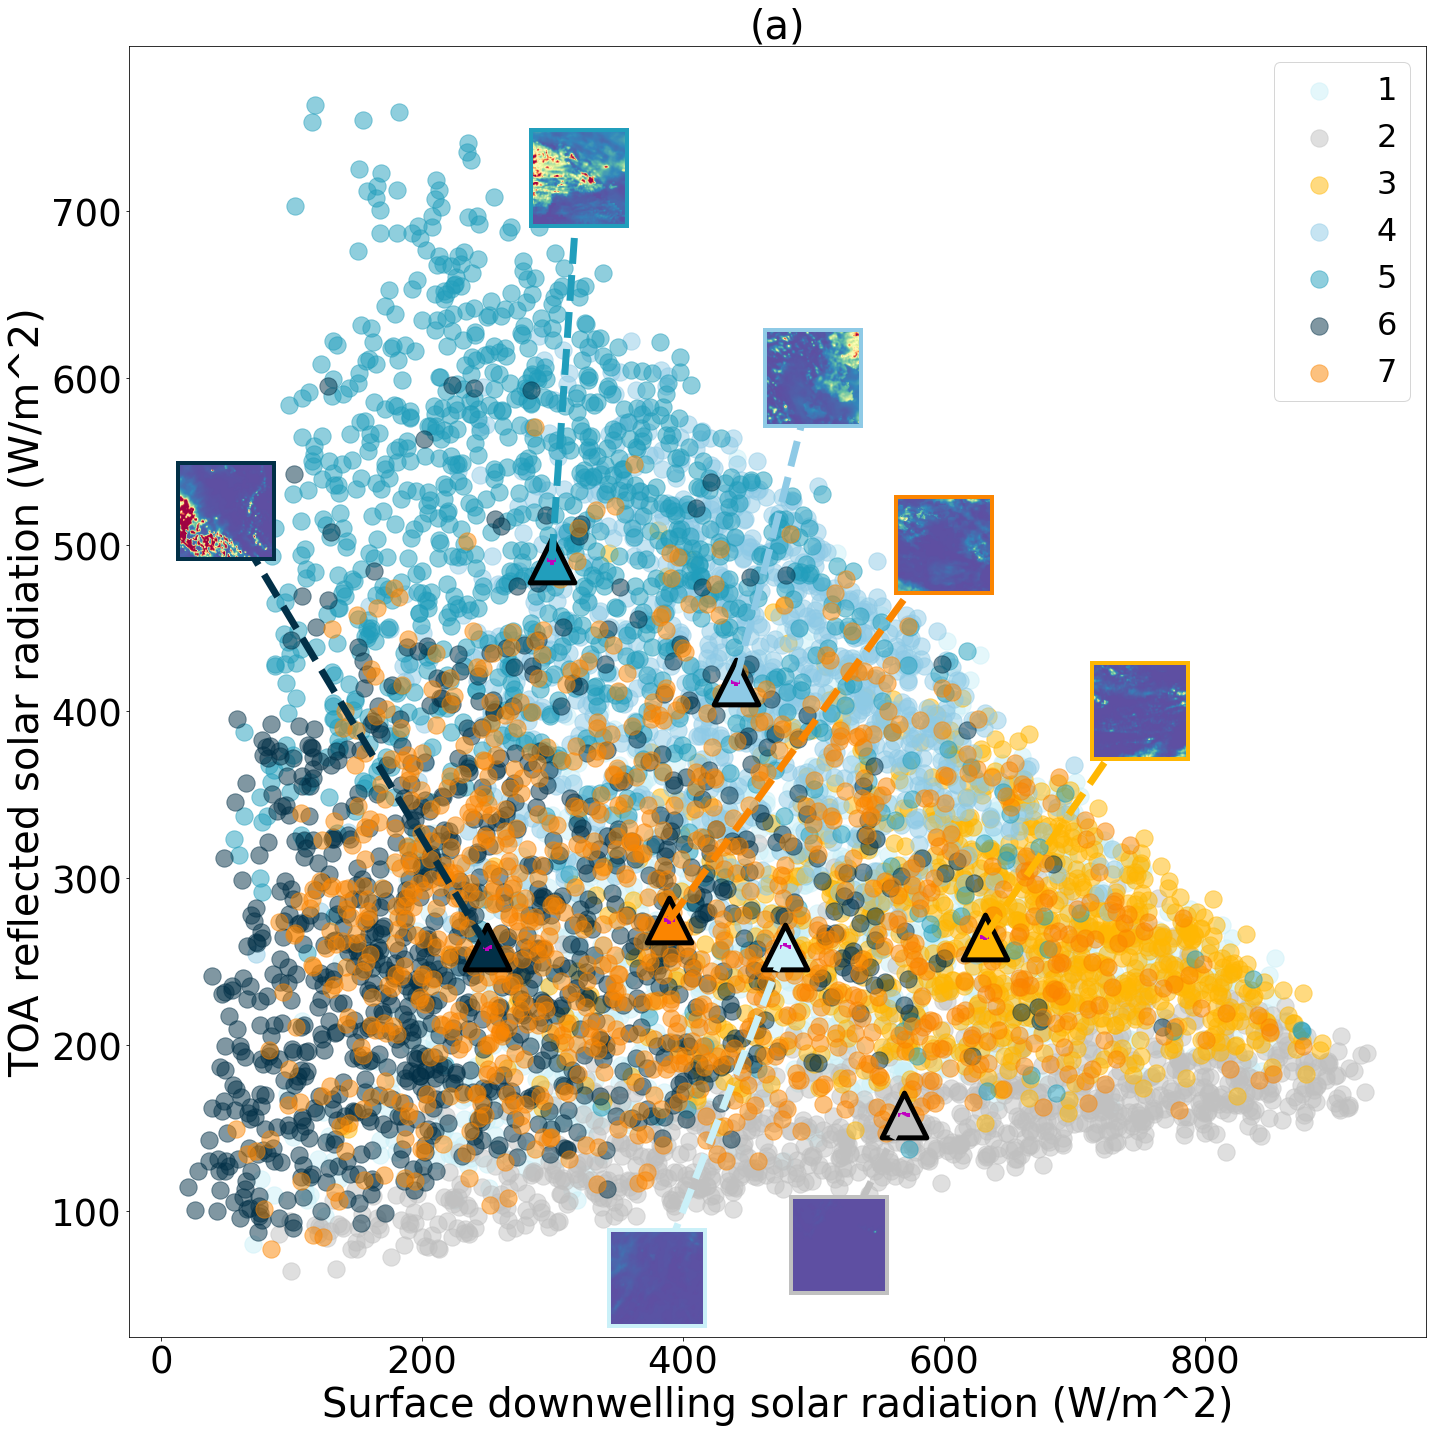

In [41]:
plot_size=1000
max_image_size=100

offset = max_image_size // 2
image_centers_area_size = plot_size - 2 * offset

tsne_plot = 255 * np.ones((plot_size, plot_size, 3), np.uint8)

x_pos =[380,520,750,500,320,50,600,450,500,450]
y_pos = [60,80,400,600,720,520,500,430,350,520]

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)

for label in colors_per_class1:
    indices = [i for i, l in enumerate(labels_dfmain2) if l == label]
    
    current_tx = df_main2.iloc[indices]['sds_mean']    # indices are taking care of the correspondence
    current_ty = df_main2.iloc[indices]['trs_mean']
    color = np.array([colors_per_class1[label]], dtype=np.float) / 255
    ax.scatter(current_tx, current_ty, c=color, label=int(label) + 1, s= 300,alpha=0.5)
    ax.legend(loc='best')
    #ax.scatter(sds_mean[int(label)], trs_mean[int(label)], c=color, label='_nolegend_', marker='^', s=2000,)
    
    
    x, y = sds_mean[int(label)], trs_mean[int(label)]
    endy = y + std_mean_trs[(int(label))] #* math.sin(math.radians(90))
    endx = x + std_mean_sds[(int(label))] #* math.cos(math.radians(0))
    plt.plot(((x-((x+endx)/2-x)),((x+endx)/2)),(y,y),'m',linewidth=4.0)
    plt.plot((x,x),((y-((y+endy)/2-y)),((y+endy)/2)),'m',linewidth=4.0)#, [y, endy]
    
    x, y = sds_mean[int(label)], trs_mean[int(label)]
    endx,endy= x_pos[int(label)],y_pos[int(label)]
    ax.plot([x, endx], [y, endy],'--',color = color[0],linewidth=7)
    
    x_loc,y_loc = x_pos[int(label)],y_pos[int(label)]
    image_path = df_main2.iloc[min_idx_labels[int(label)]]['location']

    image = plt.imread(image_path) # cv2.imread(image_path)
    image = scale_image(image, max_image_size)
    image = draw_rectangle_by_class(image, label)
    
        
    offset=OffsetImage(image)
    ab = AnnotationBbox(offset, (x_loc, y_loc), frameon=False)    
    ax.add_artist(ab)
    
for label in colors_per_class1:
    color = np.array([colors_per_class1[label]], dtype=np.float) / 255
    ax.scatter(sds_mean[int(label)], trs_mean[int(label)], c=color, label='_nolegend_', marker='^', s=2000,edgecolors='black',linewidth=5)
    
#ax.legend(loc='best')
plt.legend(prop={'size': 32})
ax.tick_params(axis='both', which='major', labelsize=37)
ax.set_title('(a)',fontsize=f_title)
plt.xlabel('Surface downwelling solar radiation (W/m^2)',fontsize=40)
plt.ylabel('TOA reflected solar radiation (W/m^2)',fontsize=40)
plt.tight_layout()
plt.show()

In [42]:
fig.savefig('/p/project/deepacf/kiste/DC/dataset/result_largescale/sds_trs_k7oct.png',transparent=False,dpi=80,bbox_inches='tight')